In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm, skew
import seaborn as sns
import itertools
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import autocorrelation_plot
from sklearn.decomposition import PCA
from matplotlib import colors as mcolors 
import math 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from itertools import cycle
from pylab import rcParams
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter




## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
trainPriceRange = train["price_range"]


In [4]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (2000, 21)
Test data shape: (1000, 21)


In [5]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
train.describe(include='all')


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


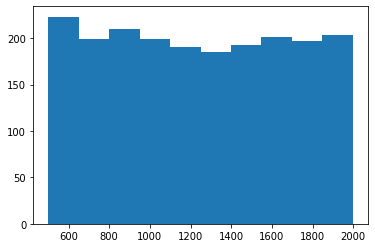

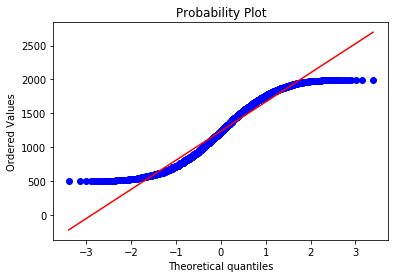

In [9]:
plt.hist(train['battery_power'])
plt.show()

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['battery_power'], plot=plt)
plt.show() 

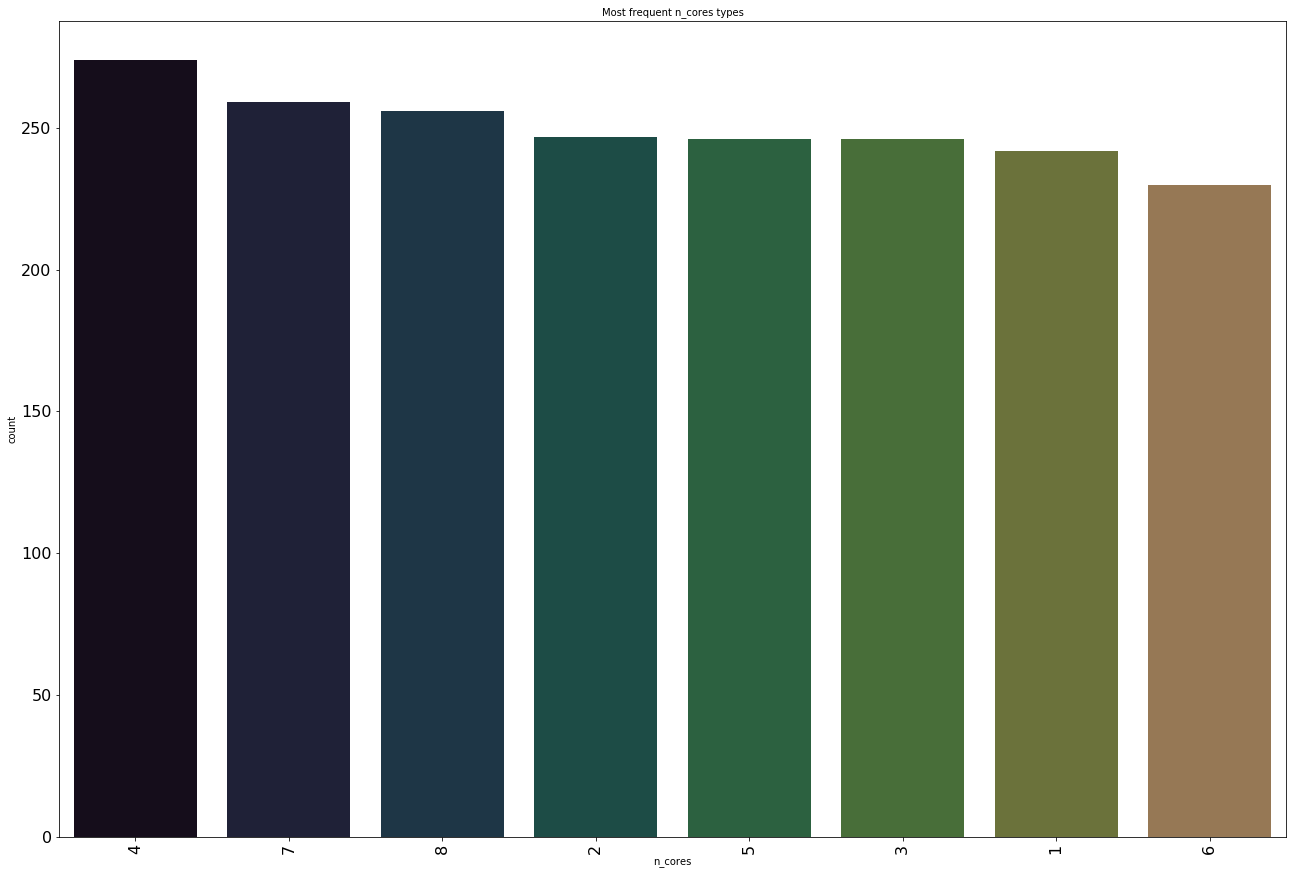

In [10]:
plt.figure(figsize=(22,15))
plt.title('Most frequent n_cores types',fontsize=10)
plt.xlabel('n_cores')
sns.countplot(train.n_cores,order=pd.value_counts(train.n_cores).iloc[:15].index,palette=sns.color_palette("cubehelix", 15))
plt.xticks(size=16,rotation=90)
plt.yticks(size=16)
plt.show()

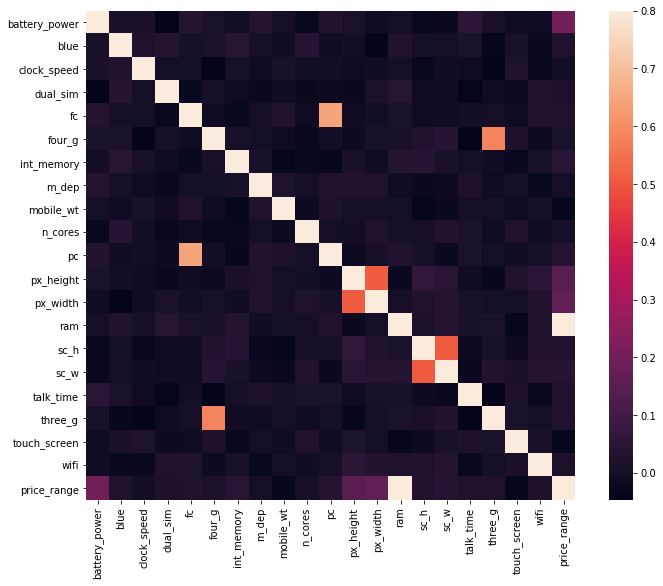

In [11]:
#show the correlation between all fetures with each other
corrmat = train.corr()
f , ax = plt.subplots(figsize = (12 , 9))
sns.heatmap(corrmat , vmax=0.8 , square=True )

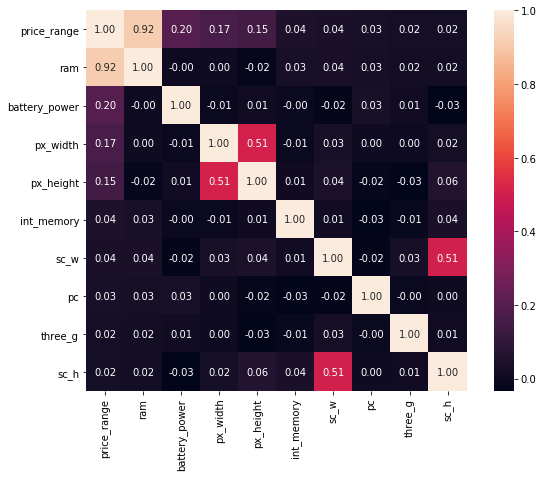

In [12]:
#finding the most 10 correlated features with price_range
k = 10
cols = corrmat.nlargest(k , 'price_range')['price_range'].index
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (10 , 7))
sns.heatmap(cm , annot=True , cbar=True , square=True , fmt='.2f', yticklabels=cols.values , xticklabels=cols.values)

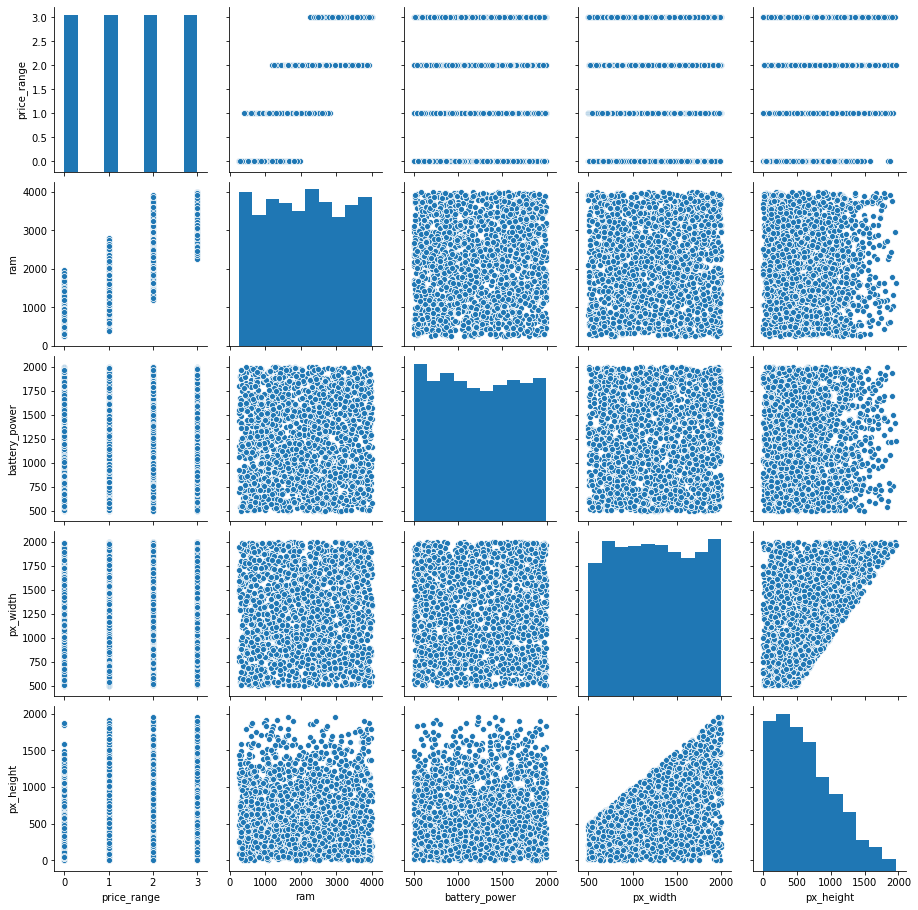

In [13]:
#the selected most affected features is
cols = ['price_range','ram','battery_power' , 'px_width' , 'px_height']
sns.pairplot(train[cols] , height = 2.5)

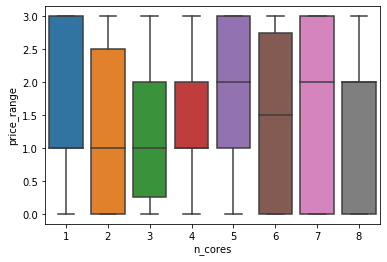

In [14]:
sns.boxplot(train['n_cores'],train['price_range'])
plt.show()

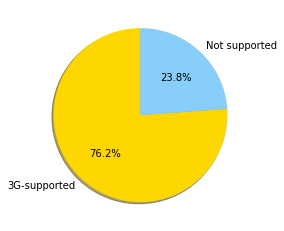

In [15]:
labels = ["3G-supported",'Not supported']
values = train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

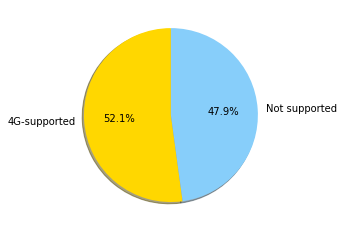

In [16]:
labels = ["4G-supported",'Not supported']
values = train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

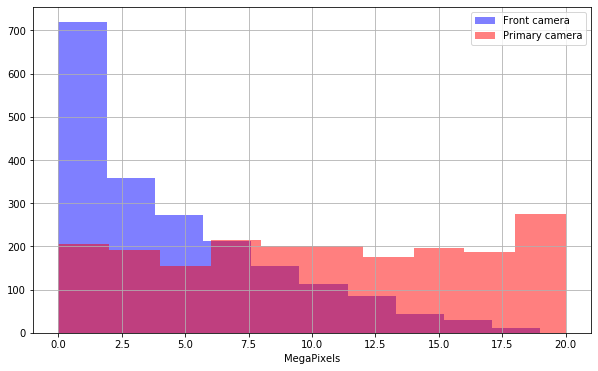

In [17]:
plt.figure(figsize=(10,6))
train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [18]:
##PREPROCESSING

In [19]:
## 2a How many columns include missing values 
print('The dataset contains NaN values: ',train.isnull().values.any())
print('Missing values in the dataset : ',train.isnull().values.sum())
for col in train.columns:
    nans=pd.value_counts(train[col].isnull())
    if len(nans)>1:
        print('Column: ',col,' , Missing values: ',nans[1])

The dataset contains NaN values:  False
Missing values in the dataset :  0


In [20]:
##train.dropna(inplace=True)

In [21]:
print('The dataset contains NaN values: ',test.isnull().values.any())
print('Missing values in the dataset : ',test.isnull().values.sum())
for col in test.columns:
    nans=pd.value_counts(test[col].isnull())
    if len(nans)>1:
        print('Column: ',col,' , Missing values: ',nans[1])

The dataset contains NaN values:  False
Missing values in the dataset :  0


In [22]:
scaler = MinMaxScaler()
scaler.fit(train)
trainDataScaled = scaler.transform(train)

In [23]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(trainDataScaled)

In [24]:
metrics.adjusted_rand_score(trainPriceRange.values, kmeans.labels_) 

-2.5815143755717175e-05

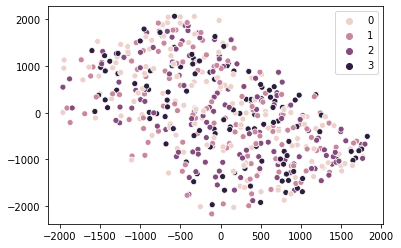

In [25]:
embedding = MDS(n_components = 2)
trainDataTransformed = embedding.fit_transform(train[:500])
ax = sns.scatterplot(x = trainDataTransformed[:, 0], y = trainDataTransformed[:, 1],
                     hue = kmeans.labels_[:500])

In [26]:
## 1 ELBOW METHOD

In [27]:
X= StandardScaler().fit_transform(train)

In [28]:
wscc = []

for i in range(1, 11):
    
    # 1. Fit the KMeans algorithm to our data X
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10, random_state = 42)
    kmeans.fit(X)
    
    """
    ::: KMeans args :::
    max_iter : the maximum number of iteration there can be to find
               the final clusters when KMeans algorithm is running.
               
    n_init   : the number of times the KMeans algorithm will be run
               with different initial centroids.
    """
    
    # 2. Compute the within cluster Sum of Swuares and Append to
    # our WSCC list (a.k.a. Inertia)
    wscc.append(kmeans.inertia_)

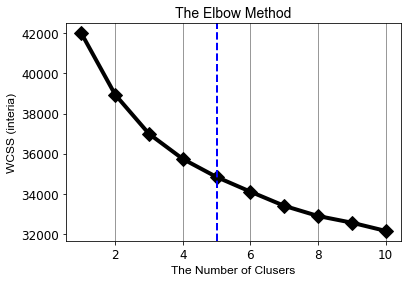

In [29]:
# Plot the Elbow Method
_ = plt.plot(range(1, 11), wscc, linewidth = 4, color = 'black',
             marker = 'D', markersize = 10)
_ = plt.title('The Elbow Method', family = 'Arial', fontsize = 14, color = 'black')
_ = plt.xlabel('The Number of Clusers', family = 'Arial', fontsize = 12, color = 'black')
_ = plt.ylabel('WCSS (interia)', family = 'Arial', fontsize = 12, color = 'black')
_ = plt.xticks(fontsize = 12, color = 'black')
_ = plt.yticks(fontsize = 12, color = 'black')
_ = plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)

number_of_clusters = 5 # Define it after check the Elbow!

_ = plt.axvline(x = number_of_clusters, linewidth = 2, color = 'blue', linestyle = '--')
_ = plt.show()

In [30]:
silhouette_score(X, kmeans.labels_)


0.05054749842526811

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

In [32]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

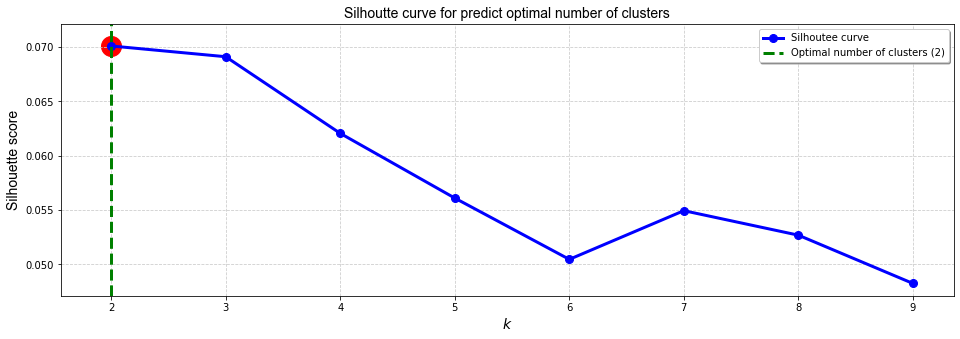

In [33]:
# Plot the silhoutee scores graph
rcParams['figure.figsize'] = 16, 5
_ = plt.plot(range(2, 10), silhouette_scores, "bo-", color='blue',
             linewidth=3, markersize=8, label='Silhoutee curve')
_ = plt.xlabel("$k$", fontsize=14, family='Arial')
_ = plt.ylabel("Silhouette score", fontsize=14, family='Arial')
_ = plt.grid(which='major', color='#cccccc', linestyle='--')

_ = plt.title('Silhoutte curve for predict optimal number of clusters', family='Arial', fontsize=14)

# Calculate the optimal number of cluster
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark optimal number of clusters
_ = plt.axvline(x=k, linestyle='--', c='green', linewidth=3,
                label='Optimal number of clusters ({})'.format(k))

_ = plt.scatter(k, silhouette_scores[k-2], c='red', s=400)

_ = plt.legend(shadow=True)

_ = plt.show()

In [34]:
print('The optimal number of cluster for a given data is {}.'.format(k))


The optimal number of cluster for a given data is 2.


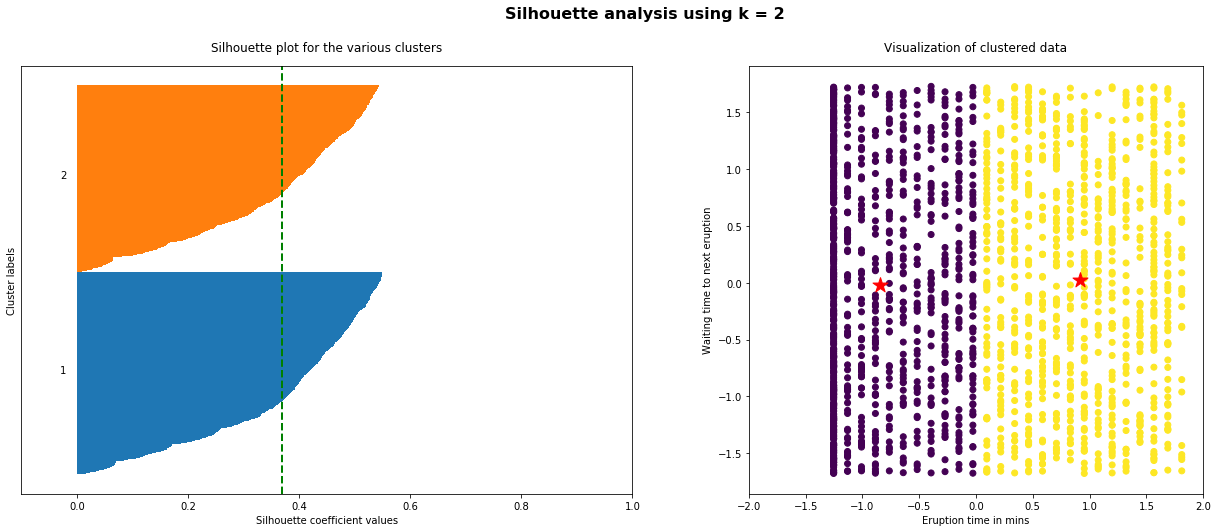

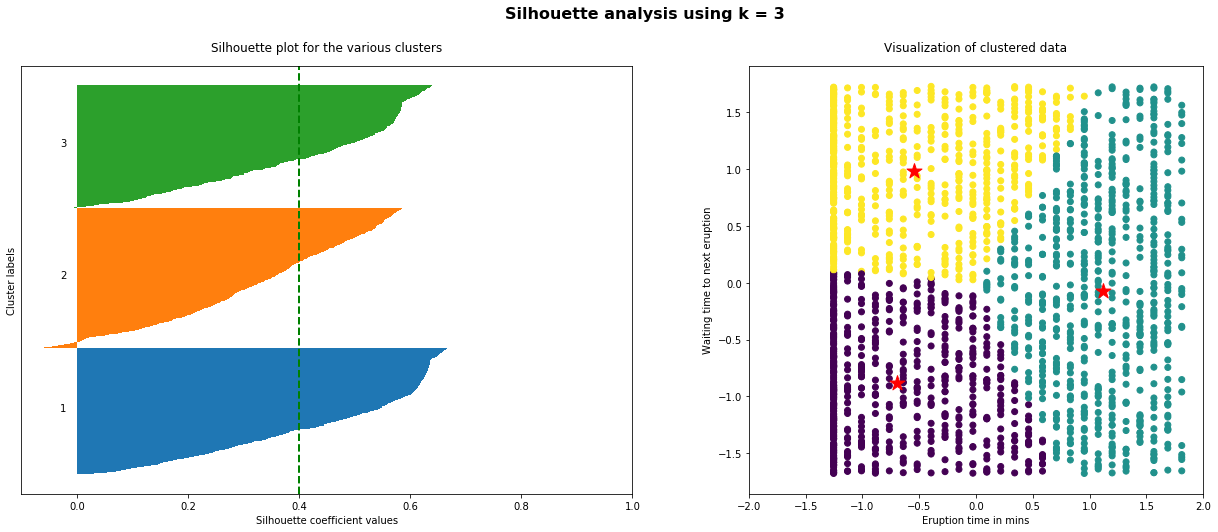

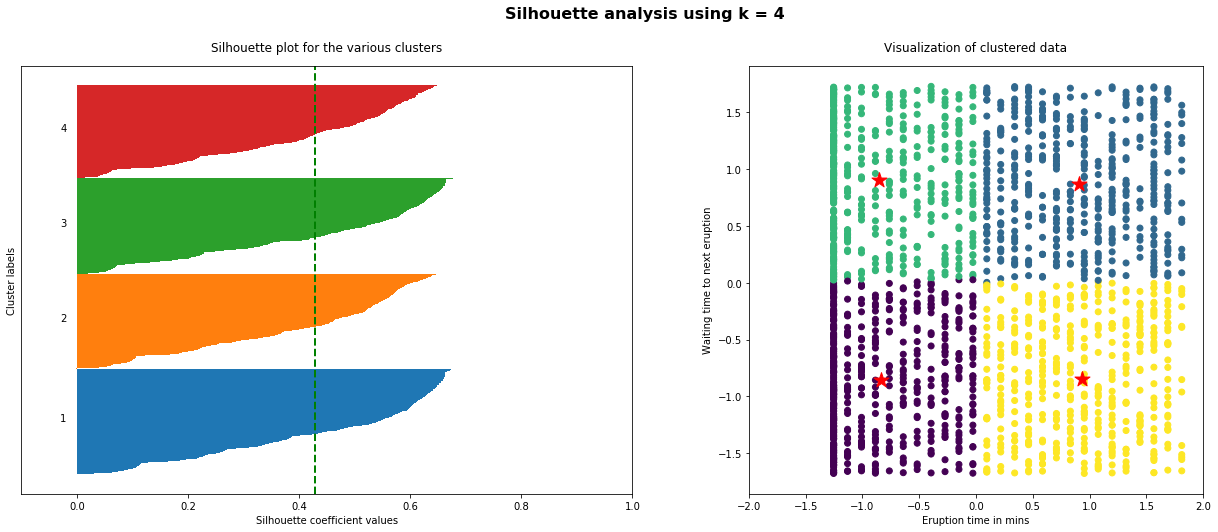

In [35]:
X_std=StandardScaler().fit_transform(train[['clock_speed','battery_power']].values)
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km2 = KMeans(n_clusters=k)
    labels = km2.fit_predict(X_std)
    centroids = km2.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05); 

Computing adjusted_rand_score for 100 values of n_clusters and n_samples=100
done in 0.416s
Computing v_measure_score for 100 values of n_clusters and n_samples=100
done in 0.581s
Computing ami_score for 100 values of n_clusters and n_samples=100
done in 17.277s
Computing mutual_info_score for 100 values of n_clusters and n_samples=100
done in 0.496s
Computing adjusted_rand_score for 555 values of n_clusters and n_samples=555
done in 3.714s
Computing v_measure_score for 555 values of n_clusters and n_samples=555
done in 3.797s
Computing ami_score for 555 values of n_clusters and n_samples=555
done in 60.047s
Computing mutual_info_score for 555 values of n_clusters and n_samples=555
done in 3.594s


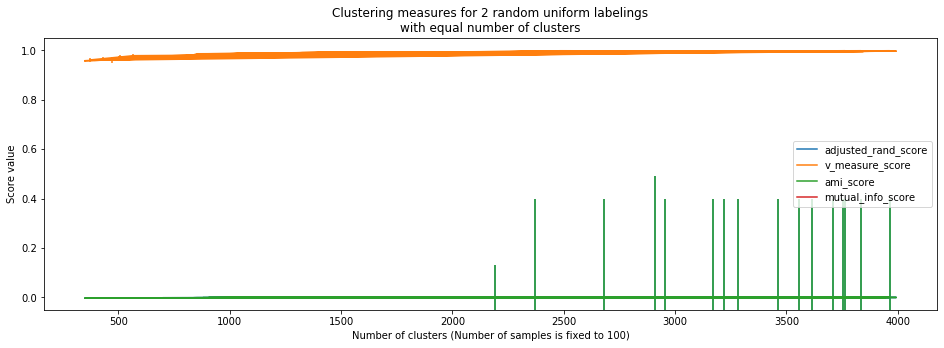

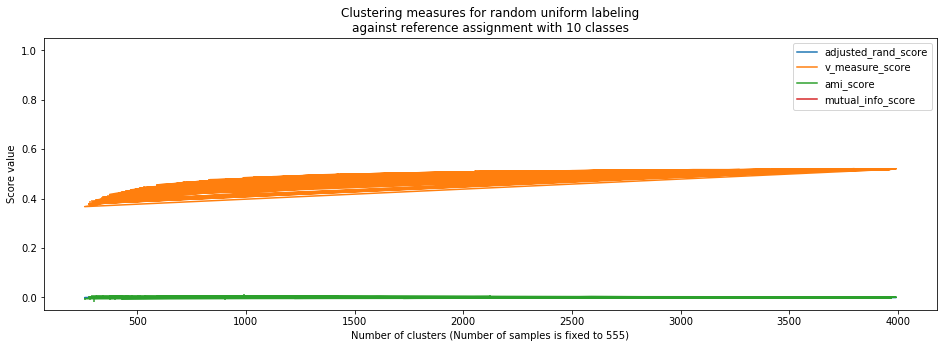

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics

def uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                             fixed_n_classes=None, n_runs=5, seed=42):
    """Compute score for 2 random uniform cluster labelings.

    Both random labelings have the same number of clusters for each value
    possible value in ``n_clusters_range``.

    When fixed_n_classes is not None the first labeling is considered a ground
    truth class assignment with fixed number of classes.
    """
    random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))

    if fixed_n_classes is not None:
        labels_a = random_labels(low=0, high=fixed_n_classes, size=n_samples)

    for i, k in enumerate(n_clusters_range):
        for j in range(n_runs):
            if fixed_n_classes is None:
                labels_a = random_labels(low=0, high=k, size=n_samples)
            labels_b = random_labels(low=0, high=k, size=n_samples)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores


def ami_score(U, V):
    return metrics.adjusted_mutual_info_score(U, V)

score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    ami_score,
    metrics.mutual_info_score,
]

# 2 independent random clusterings with equal cluster number

n_samples = 100
data=train['ram'].values
data=data[0:100]
n_clusters_range = data.astype(np.int)
#n_clusters_range=np.linspace(2, n_samples, 10).astype(np.int)

plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for 2 random uniform labelings\n"
          "with equal number of clusters")
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.legend(plots, names)
plt.ylim(bottom=-0.05, top=1.05)


# Random labeling with varying n_clusters against ground class labels
# with fixed number of clusters

n_samples = 555
data=train['ram'].values
data=data[0:555]
n_clusters_range = data.astype(np.int)
#n_clusters_range=np.linspace(2, n_samples, 10).astype(np.int)

n_classes = 10

plt.figure(2)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                                      fixed_n_classes=n_classes)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, scores.mean(axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for random uniform labeling\n"
          "against reference assignment with %d classes" % n_classes)
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.ylim(bottom=-0.05, top=1.05)
plt.legend(plots, names)
plt.show()

In [37]:
# Hierarchical methods 

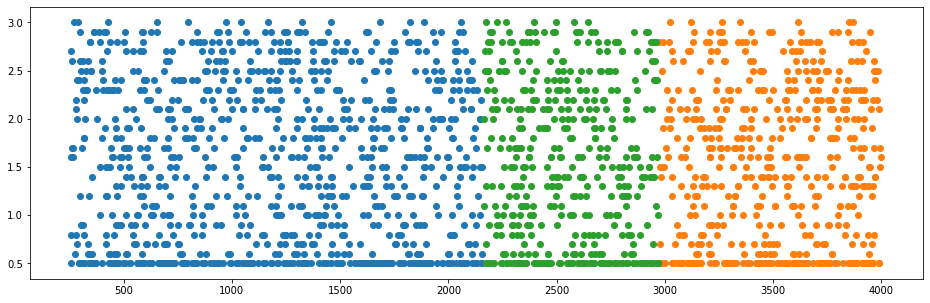

In [38]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
# define the model
X=train[['ram','clock_speed']].values
n_samples = len(X)
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

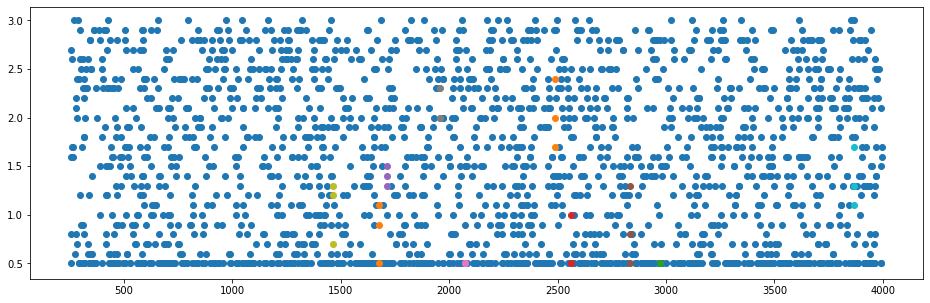

In [39]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X=train[['ram','clock_speed']].values
# define the model
min_samples=len(X)/20
model = DBSCAN(eps=0.5, min_samples=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

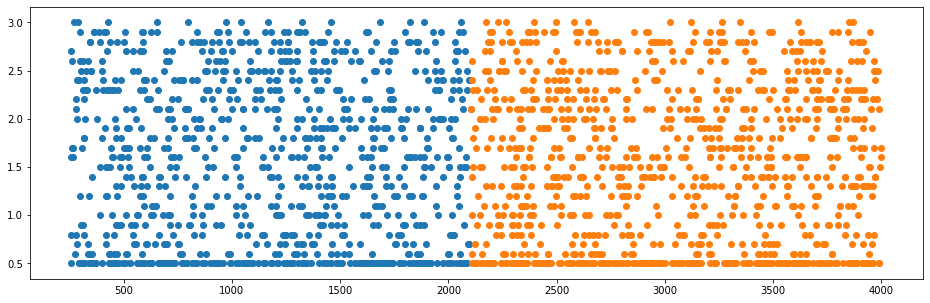

In [40]:
#K-MEAN
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X  = train[['ram','clock_speed']].values
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()